# Module 1. Exploratory Data Analysis
This chapter highlights the essential first step in any data science project: exploring the data. Unlike classical statistics, which primarily deals with complex inference procedures to conclude large populations from small samples, data exploration offers a more direct approach.

#### Below are the steps to install R packages while using Jupyter Notebook.
- Display current library search paths where R looks for packages.

In [5]:
.libPaths()

[1] "/Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library"

- Assign it to a variable

In [7]:
lib_path <- '/Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library'

 - Installing necessary R packages

In [62]:
install.packages('dplyr', lib = lib_path)
install.packages('tidyr', lib = lib_path)
install.packages('ggplot2', lib = lib_path)
install.packages('vioplot', lib = lib_path)
install.packages('corrplot', lib = lib_path)
install.packages('gmodels', lib = lib_path)
install.packages('matrixStats', lib = lib_path)
install.packages('reshape2', lib = lib_path)
install.packages('hexbin', lib = lib_path)
install.packages('descr', lib = lib_path)


The downloaded binary packages are in
	/var/folders/bm/0df2kcrd4pqdsjmb2dh3w2tm0000gn/T//RtmpthfdvG/downloaded_packages

The downloaded binary packages are in
	/var/folders/bm/0df2kcrd4pqdsjmb2dh3w2tm0000gn/T//RtmpthfdvG/downloaded_packages

The downloaded binary packages are in
	/var/folders/bm/0df2kcrd4pqdsjmb2dh3w2tm0000gn/T//RtmpthfdvG/downloaded_packages

The downloaded binary packages are in
	/var/folders/bm/0df2kcrd4pqdsjmb2dh3w2tm0000gn/T//RtmpthfdvG/downloaded_packages

The downloaded binary packages are in
	/var/folders/bm/0df2kcrd4pqdsjmb2dh3w2tm0000gn/T//RtmpthfdvG/downloaded_packages

The downloaded binary packages are in
	/var/folders/bm/0df2kcrd4pqdsjmb2dh3w2tm0000gn/T//RtmpthfdvG/downloaded_packages

The downloaded binary packages are in
	/var/folders/bm/0df2kcrd4pqdsjmb2dh3w2tm0000gn/T//RtmpthfdvG/downloaded_packages

The downloaded binary packages are in
	/var/folders/bm/0df2kcrd4pqdsjmb2dh3w2tm0000gn/T//RtmpthfdvG/downloaded_packages

The downloaded binary packages 

also installing the dependency ‘xtable’





The downloaded binary packages are in
	/var/folders/bm/0df2kcrd4pqdsjmb2dh3w2tm0000gn/T//RtmpthfdvG/downloaded_packages


In [25]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(vioplot)
library(corrplot)
library(gmodels)
library(matrixStats)
library(reshape2)
library(hexbin)

In [77]:
# Set the PSDS_PATH to the specific directory
PSDS_PATH <- '/Users/rohitrishav/Work/Projects/practicalStats/data'

# Read the data from the specified directory
state <- read.csv(file.path(PSDS_PATH, 'state.csv'))
dfw <- read.csv(file.path(PSDS_PATH, 'dfw_airline.csv'))
sp500_px <- read.csv(file.path(PSDS_PATH, 'sp500_data.csv.gz'), row.names = 1)
sp500_sym <- read.csv(file.path(PSDS_PATH, 'sp500_sectors.csv'), stringsAsFactors = FALSE)
kc_tax <- read.csv(file.path(PSDS_PATH, 'kc_tax.csv.gz'))
lc_loans <- read.csv(file.path(PSDS_PATH, 'lc_loans.csv'))
airline_stats <- read.csv(file.path(PSDS_PATH, 'airline_stats.csv'), stringsAsFactors = FALSE)

# Display the airline_stats data
head(airline_stats)

# Set the airline levels
airline_stats$airline <- factor(airline_stats$airline, 
                                levels = c('Alaska', 'American', 'Jet Blue', 'Delta', 'United', 'Southwest'))

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
,<dbl>,<dbl>,<dbl>,<chr>
1,8.153226,1.971774,0.7620968,American
2,5.959924,3.706107,1.5858779,American
3,7.157270,2.706231,2.0267062,American
4,12.100000,11.033333,0.0000000,American
5,7.333333,3.365591,1.7741935,American
6,6.163889,3.225000,0.9750000,American


## 1. Location Estimation
- Location Estimates of Population and Murder Rates

In [17]:
# Table 1-2
state_asc <- state
state_asc[['Population']] <- formatC(state_asc[['Population']], format='d', digits=0, big.mark=',')
state_asc[1:8,]

,State,Population,Murder.Rate,Abbreviation
,<chr>,<chr>,<dbl>,<chr>
1,Alabama,"4,779,736",5.7,AL
2,Alaska,"710,231",5.6,AK
3,Arizona,"6,392,017",4.7,AZ
4,Arkansas,"2,915,918",5.6,AR
5,California,"37,253,956",4.4,CA
6,Colorado,"5,029,196",2.8,CO
7,Connecticut,"3,574,097",2.4,CT
8,Delaware,"897,934",5.8,DE


## 2. Variability Estimation
- **Mean, Trimmed Mean, and Median** for the population

In [ ]:
# Mean
mean(state[['Population']])

In [25]:
# Trimmed Mean
mean(state[['Population']], trim = 0.1)

[1] 4783697

In [27]:
# Median
median(state[['Population']])

[1] 4436370

The mean is bigger than the trimmed mean and bigger than the median. 
The reason for this is that the trimmed mean omits the five states with the highest and lowest values (with a `trim=0.1`, it removes `10%` from each end). To calculate the national average murder rate, it is essential to use either a weighted mean or median to consider the varying populations across states. As base R lacks a built-in function for the weighted median, it is necessary to install an additional package like `matrixStats` to perform this calculation:

In [30]:
install.packages('matrixStats', lib = lib_path)


The downloaded binary packages are in
	/var/folders/bm/0df2kcrd4pqdsjmb2dh3w2tm0000gn/T//RtmpvQdKc2/downloaded_packages


In [12]:
library('matrixStats')

In [14]:
weightedMedian(state[['Murder.Rate']], w=state[['Population']])

[1] 4.4

#### 2.1 Standard Deviation, IQR, and MAD
- IQR - The Interquartile Range
- MAD - The median absolute deviation from the median 

In [15]:
sd(state[['Population']])

[1] 6848235

In [19]:
IQR(state[['Population']])

[1] 4847308

In [21]:
mad(state[['Population']])

[1] 3849870

#### 2.2 Percentiles and Boxplots

In [29]:
quantile(state[['Murder.Rate']], p=c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

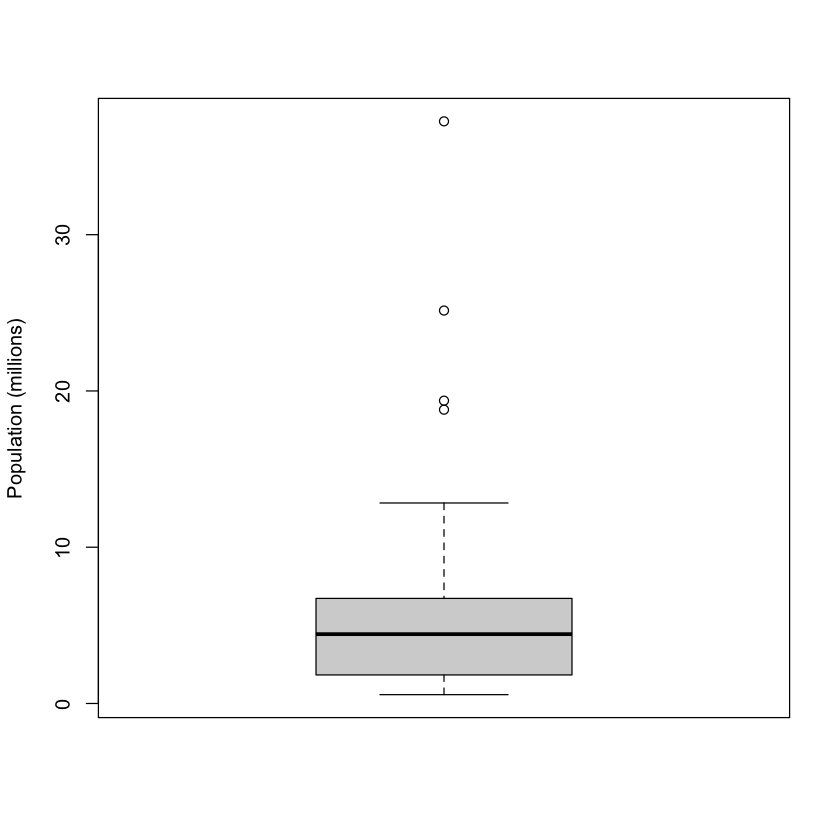

In [31]:
boxplot(state[['Population']]/1000000, ylab='Population (millions)')

#### 2.3 Frequency Tables and Histograms

In [34]:
breaks <- seq(from=min(state[['Population']]),
to=max(state[['Population']]), length=11)
pop_freq <- cut(state[['Population']], breaks=breaks,
right=TRUE, include.lowest=TRUE)
table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

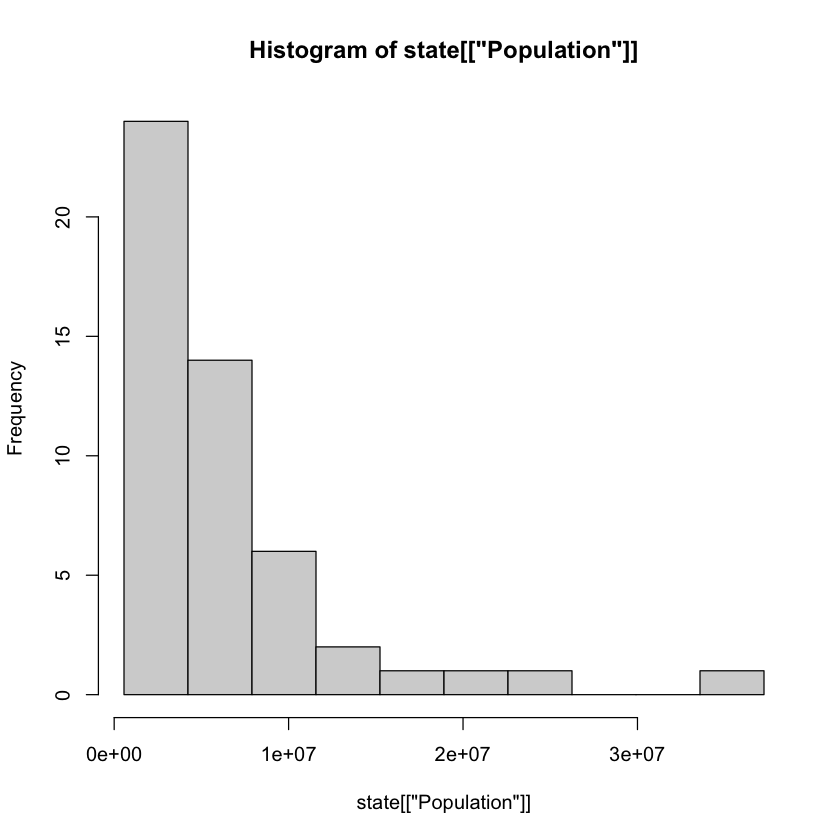

In [36]:
hist(state[['Population']], breaks=breaks)

#### 2.4 Density Plots and Estimates

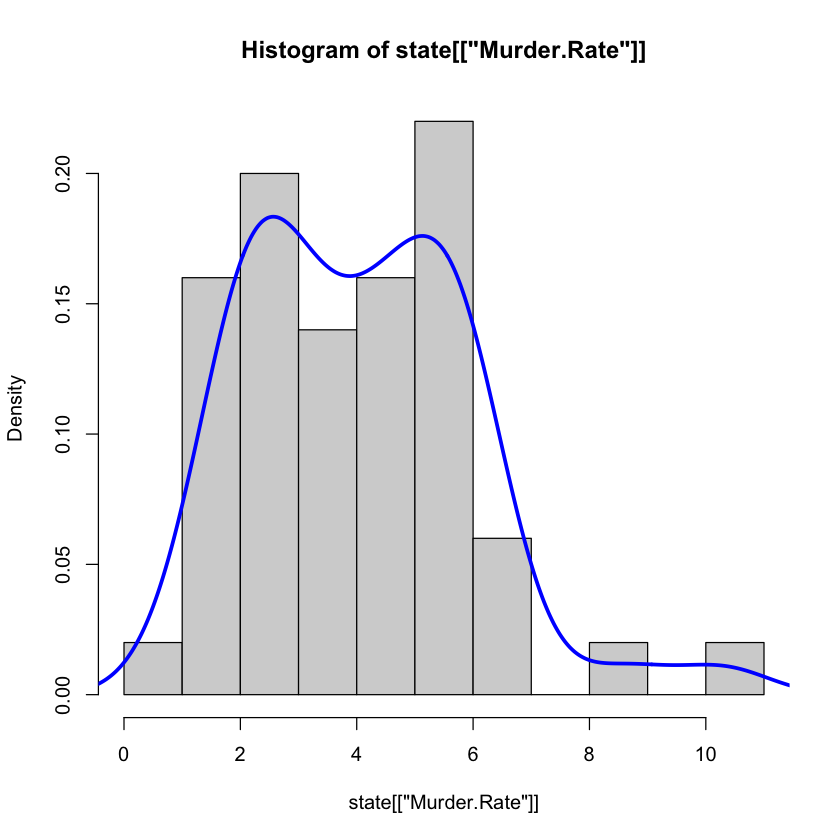

In [39]:
hist(state[['Murder.Rate']], freq=FALSE)
lines(density(state[['Murder.Rate']]), lwd=3, col='blue')

### Key Ideas
- A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis; it gives a sense of the distribution of the data at a glance.
- A frequency table is a tabular version of the frequency counts found in a histogram.
- A boxplot—with the top and bottom of the box at the 75th and 25th percentiles, respectively—also gives a quick sense of the distribution of the data; it is often used in side-by-side displays to compare distributions.
- A density plot is a smoothed version of a histogram; it requires a function to estimate a plot based on the data (multiple estimates are possible, of course).

## 3. Binary and Categorical Data
### Key Terms for Exploring Categorical Data
- **Mode:** The most commonly occurring category or value in a data set.
- **Expected value:** When the categories can be associated with a numeric value, this gives an average value based on a category’s probability of occurrence.
- **Bar charts:** The frequency or proportion for each category is plotted as bars.
- **Pie charts:** The frequency or proportion for each category plotted as wedges in a pie.

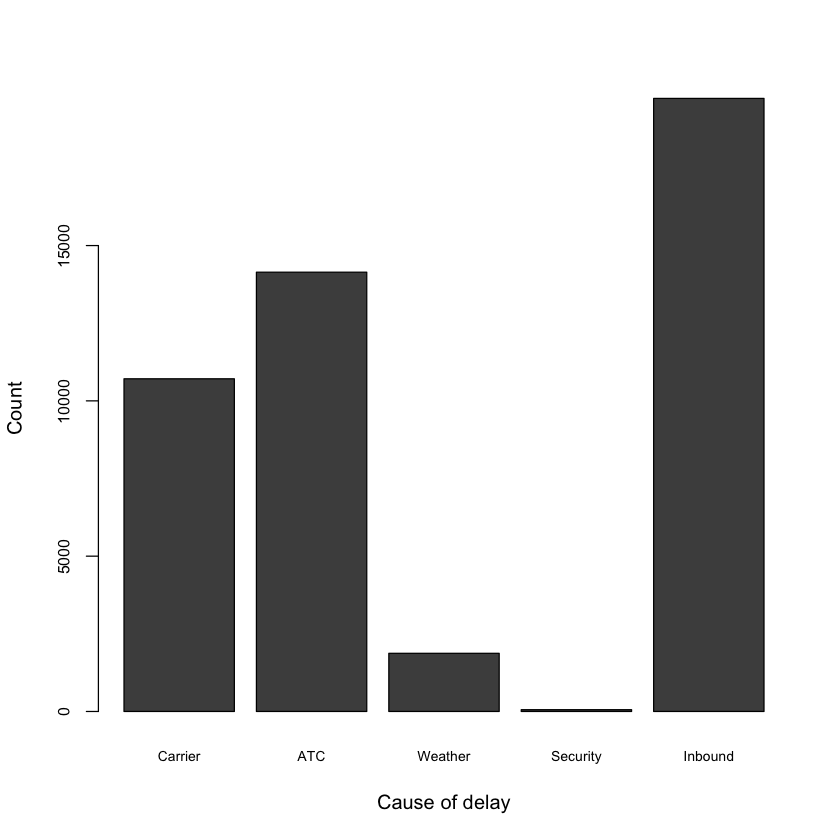

In [60]:
barplot(as.matrix(dfw) / 6, cex.axis=0.8, cex.names=0.7,
xlab='Cause of delay', ylab='Count')

### 3.1 Correlation
#### Key Terms for Correlation
- **Correlation coefficient:** A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1).
- **Correlation matrix:** A table where the variables are shown on both rows and columns and the cell values are the correlations between the variables.
- **Scatterplot:** A plot in which the x-axis is the value of one variable, and the y-axis is the value of another.

In [103]:
telecom <- sp500_px[, sp500_sym[sp500_sym$sector == 'telecommunications_services', 'symbol']]
telecom <- telecom[row.names(telecom) > '2012-07-01',]
telecom_cor <- cor(telecom)
head(telecom)

,T,CTL,FTR,VZ,LVLT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012-07-02,0.4224961,0.14084678,0.070879182,0.55418001,-0.519998
2012-07-03,-0.1774475,0.06627996,0.070879173,-0.02597636,-0.049999
2012-07-05,-0.1605477,-0.13256324,0.055128247,-0.05195619,-0.180000
2012-07-06,0.3422046,0.13256324,0.007875464,0.14010576,-0.359999
2012-07-09,0.1368825,0.12427886,-0.023626394,0.25394257,0.180000
2012-07-10,-0.2224358,-0.19055883,-0.031501859,-0.17513308,-0.619999


Next we focus on funds traded on major exchanges (sector == 'etf').

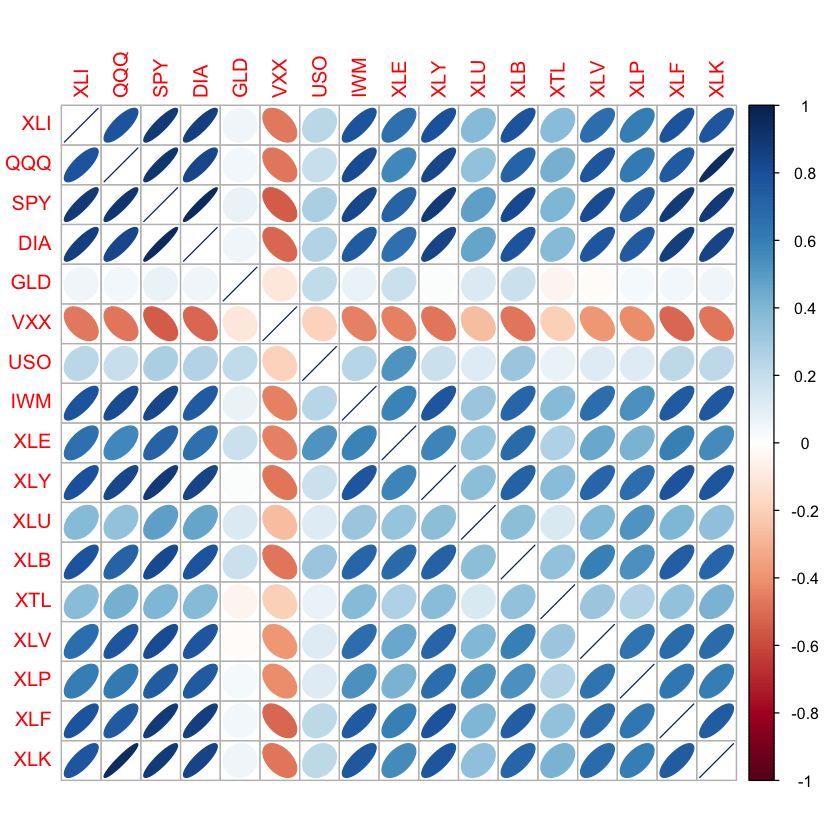

In [97]:
etfs <- sp500_px[row.names(sp500_px) > '2012-07-01', 
                 sp500_sym[sp500_sym$sector == 'etf', 'symbol']]
corrplot(cor(etfs), method='ellipse')

### 3.2 Scatter Plot

[1] 754   5

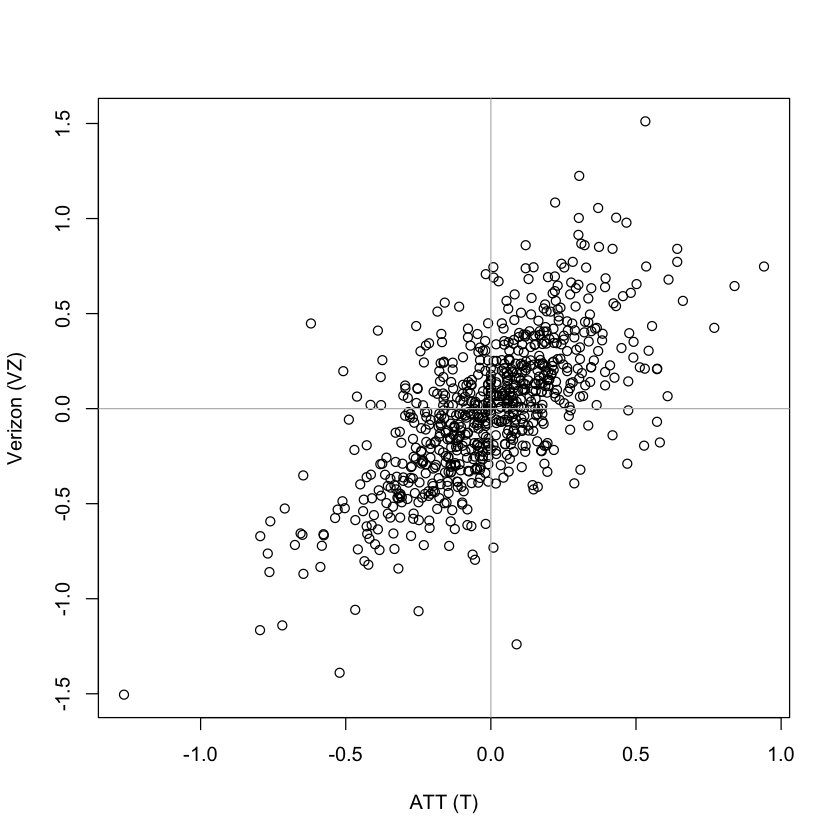

In [105]:
# plot(telecom$T, telecom$VZ, xlab='T', ylab='VZ', cex=.8)
plot(telecom$T, telecom$VZ, xlab='ATT (T)', ylab='Verizon (VZ)')
abline(h=0, v=0, col='grey')
dim(telecom)

## 4. Exploring Two or More Variables
### Key Terms for Exploring Two or More Variables
- **Contingency table:** A tally of counts between two or more categorical variables.
- **Hexagonal binning:** A plot of two numeric variables with the records binned into hexagons.
- **Contour plot:** A plot showing the density of two numeric variables like a topographical map.
- **Violin plot:** Similar to a boxplot but showing the density estimate.

### 4.1 Hexagonal Binning and Contours

In [13]:
kc_tax0 <- subset(kc_tax, TaxAssessedValue < 750000 &
SqFtTotLiving > 100 &
SqFtTotLiving < 3500)
nrow(kc_tax0)

[1] 432693

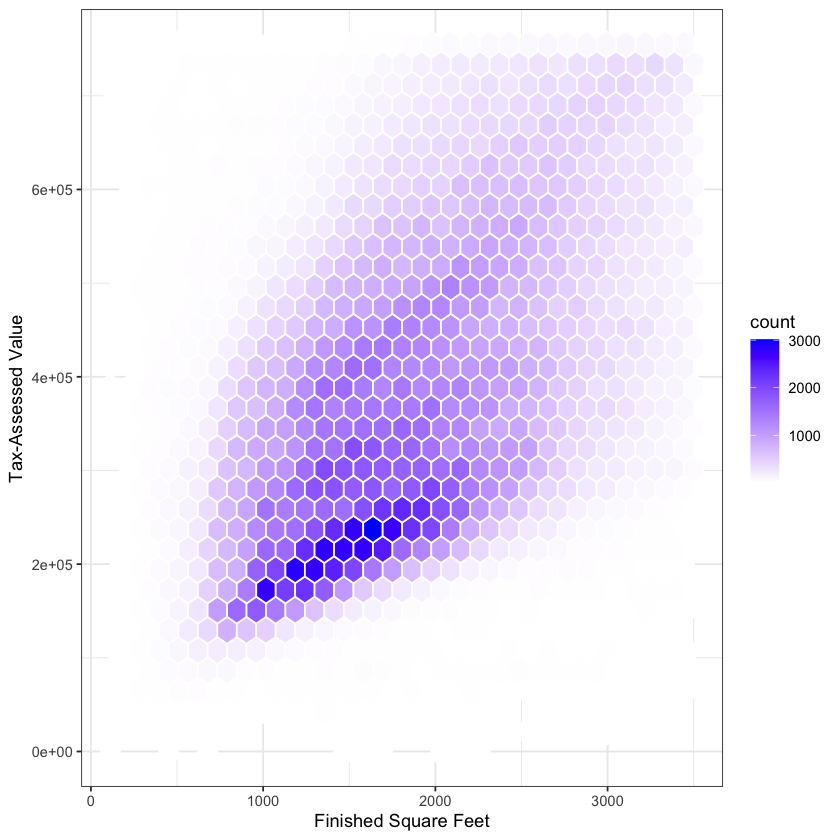

In [45]:
ggplot(kc_tax0, (aes(x=SqFtTotLiving, y=TaxAssessedValue))) +
stat_binhex(color='white') +
theme_bw() +
scale_fill_gradient(low='white', high='blue') +
labs(x='Finished Square Feet', y='Tax-Assessed Value')

The above plot is a `hexagonal binning` plot to examine the relationship between finished square feet and the tax-assessed value of homes in King County. Instead of plotting individual points, which would result in a dense, indistinguishable cluster, we organized the data into hexagonal bins, colouring each hexagon based on the number of records it contains. This approach reveals a clear positive correlation between square footage and tax value. Notably, there are additional bands above the main band, suggesting some homes with similar square footage are valued higher than others.

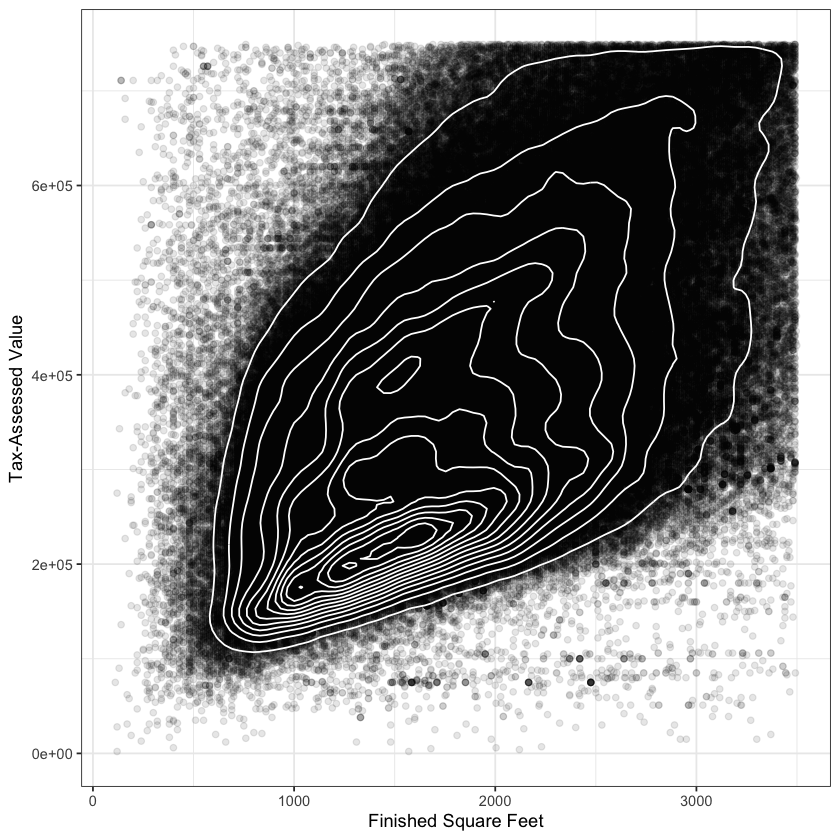

In [58]:
ggplot(kc_tax0, aes(SqFtTotLiving, TaxAssessedValue)) +
theme_bw() +
geom_point(alpha=0.1) +
geom_density2d(color='white') +
labs(x='Finished Square Feet', y='Tax-Assessed Value')

The plot above combines contours with a scatterplot to illustrate the relationship between two numeric variables. These contours act like a topographical map, with each band indicating a specific density of points, which increases toward a "peak." This visualization echoes the findings of the `hexagonal binning` plot, showing a secondary peak situated "north" of the primary one.

### 4.2 Contingency Table

In [99]:
library(descr)
x_tab <- CrossTable(lc_loans$grade, lc_loans$status,
prop.c=FALSE, prop.chisq=FALSE, prop.t=FALSE)

### 4.3 Categorical and Numeric Data

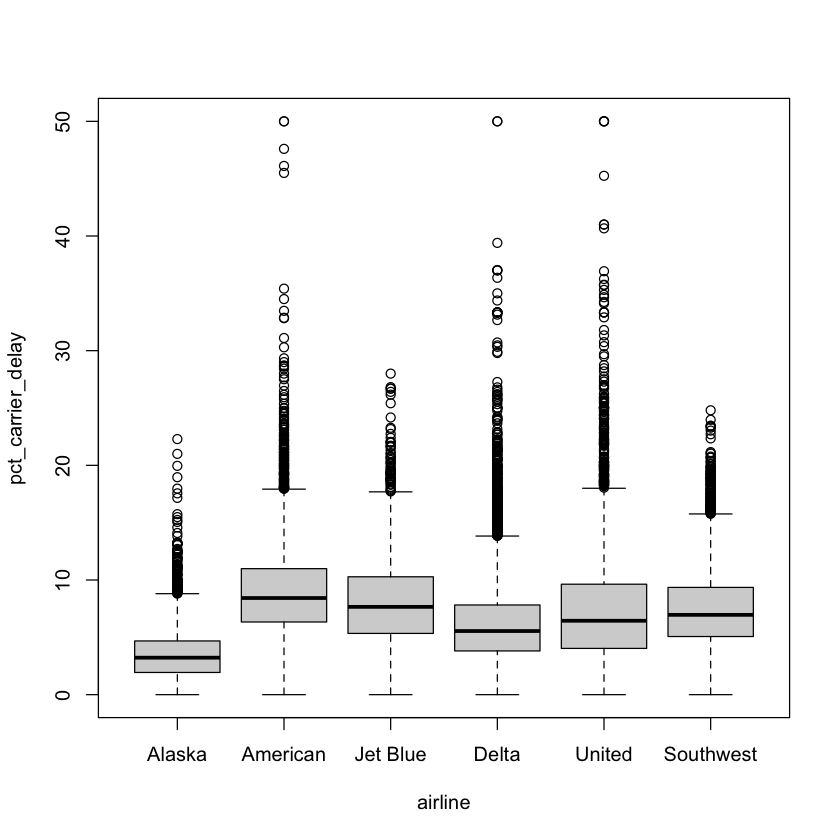

In [83]:
boxplot(pct_carrier_delay ~ airline, data=airline_stats, ylim=c(0, 50))

Alaska stands out with the fewest delays, while America experiences the most. America's lower quartile of delays is higher than Alaska's upper quartile.

**Violin Plot**
A violin plot is an advanced version of a boxplot, featuring a density estimate on the y-axis. This density is mirrored and flipped, creating a filled shape resembling a violin. The main benefit of a violin plot is its ability to reveal subtle details in data distribution that a boxplot might miss. However, boxplots are more effective at clearly displaying outliers. In `Ggplot2` we can use the `geom_violin` function to generate a violin plot.

Warning message:
“Removed 38 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


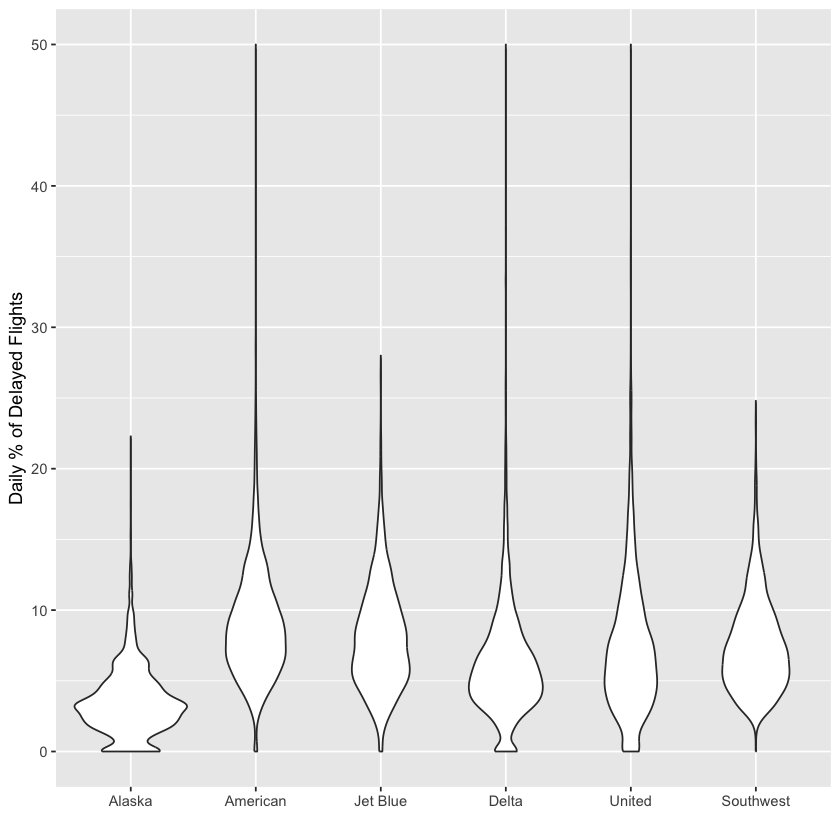

In [95]:
ggplot(data=airline_stats, aes(airline, pct_carrier_delay)) +
ylim(0, 50) +
geom_violin() +
labs(x='', y='Daily % of Delayed Flights')

### 4.4 Visualizing Multiple Variables

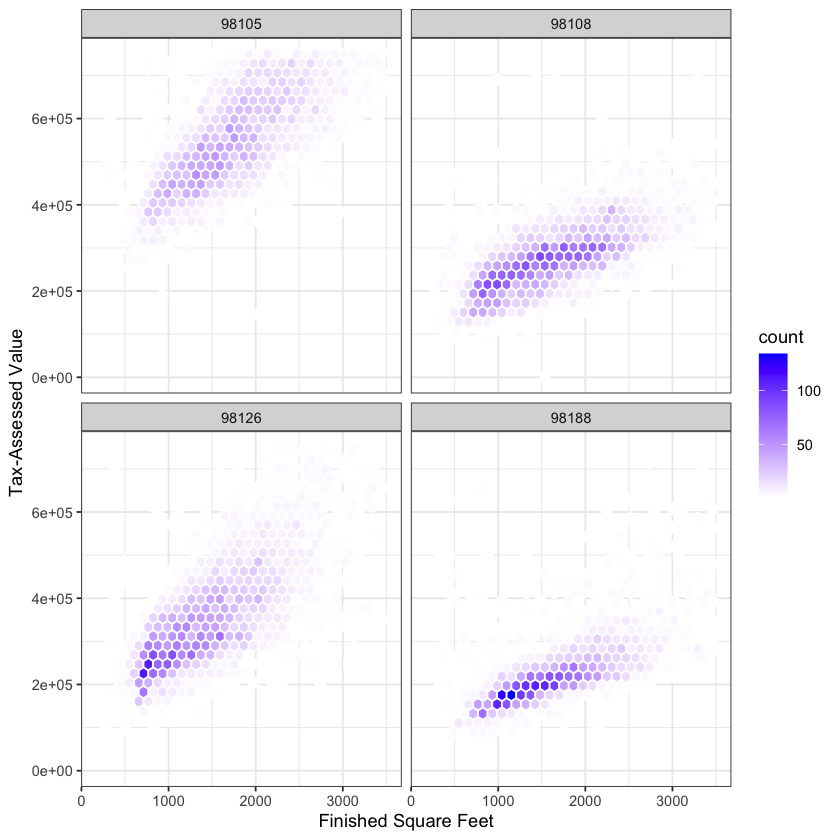

In [102]:
ggplot(subset(kc_tax0, ZipCode %in% c(98188, 98105, 98108, 98126)),
aes(x=SqFtTotLiving, y=TaxAssessedValue)) +
stat_binhex(color='white') +
theme_bw() +
scale_fill_gradient(low='white', high='blue') +
labs(x='Finished Square Feet', y='Tax-Assessed Value') +
facet_wrap('ZipCode')

## Summary:
John Tukey's Exploratory Data Analysis (EDA) laid the groundwork for modern data science. The core principle of EDA is that the initial and most critical step in any data project is to thoroughly examine the data. By summarizing and visualizing it, you can develop a deeper intuition and understanding of the project's scope.